<a href="https://colab.research.google.com/github/Jaya9yellow/December/blob/main/1_12_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf

In [70]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [71]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [72]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [73]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2599 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1039 - accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0702 - accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0520 - accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0396 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0300 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0250 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0188 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0177 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [75]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1108 - accuracy: 0.9753
0.11083915829658508
0.9753000140190125


In [76]:
model.save('mnist_model.model')

In [77]:
new_model = tf.keras.models.load_model('mnist_model.model')

In [78]:
predictions = new_model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [79]:
print(predictions)

[[4.19819816e-20 5.92334002e-14 2.82045221e-12 ... 9.99999940e-01
  1.79572011e-17 5.19605721e-14]
 [1.55072987e-20 1.22973445e-08 9.99999940e-01 ... 2.55931104e-17
  5.75042396e-18 1.59941675e-22]
 [9.98875123e-15 9.99999344e-01 1.05490849e-09 ... 2.12226084e-07
  3.78996930e-07 4.69202585e-13]
 ...
 [1.00641346e-14 1.41049741e-10 2.70554868e-12 ... 7.87790810e-09
  1.19936479e-08 8.15616602e-07]
 [1.34382894e-18 1.45710619e-13 5.58495227e-18 ... 2.76059324e-15
  1.55648223e-08 2.22118338e-19]
 [1.69131432e-13 5.53655700e-14 5.97027277e-15 ... 5.49357981e-20
  2.45637967e-16 6.44686146e-16]]


In [80]:
print(np.argmax(predictions[9]))

9


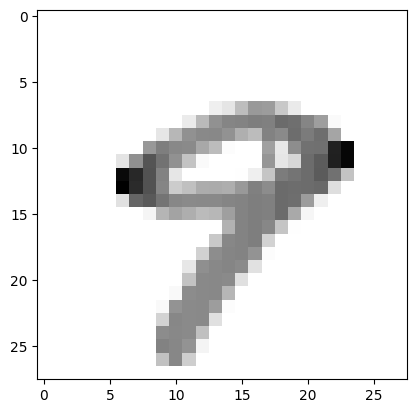

In [81]:
plt.imshow(x_test[9],cmap=plt.cm.binary)
plt.show()

In [82]:
#

(28, 28, 3)


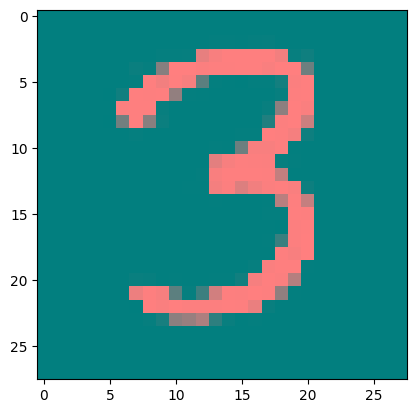

In [83]:
y=cv.imread("/content/three.png")
y1=cv.resize(y,(28,28))
plt.imshow(y1)

temp = cv.cvtColor(y1,cv.COLOR_BGR2YCrCb)
temp=255-temp
plt.imshow(temp)

print(temp.shape)

Y = np.zeros((temp.shape[0], temp.shape[1],1), dtype=float)
Y[:,:,0] = temp[:, :,0].astype(float) / 255

In [84]:
predictions_new = new_model.predict(Y.reshape(1,28,28,1))

1/1 [==============================] - 0s 72ms/step


In [85]:
print(predictions_new)

[[0.0000000e+00 7.2683155e-22 1.0429871e-20 1.0000000e+00 1.3704302e-37
  4.4642224e-20 0.0000000e+00 2.1362213e-27 4.4392709e-22 1.0246319e-31]]


In [86]:
print(np.argmax(predictions_new))

3


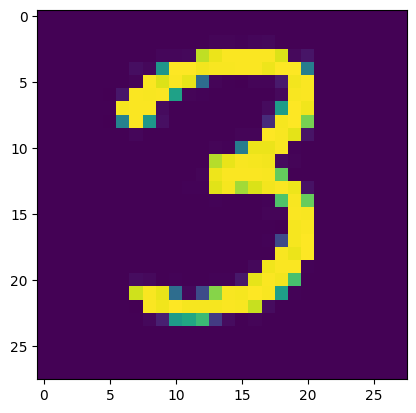

In [87]:
plt.imshow(Y)
plt.show()